## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly as ply
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline

## 2. Read all the three files

In [2]:
application = pd.read_csv("application_data.csv")
ax = pd.read_csv("application_data.csv")
columns = pd.read_csv("columns_description.csv",encoding='latin1')
prev = pd.read_csv("previous_application.csv")

## 3 Application.CSV
### 3.1 Checking Structure of Data

In [3]:
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [4]:
application.shape

(307511, 122)

In [5]:
application.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

## 3.2 Data Quality Check and Missing Values

### 3.2.1 Percentage of Missing values for all columns

In [7]:
col = application.isnull().sum()/len(application)

### 3.2.2 Remove columns with high missing percentage

In [8]:
col = list(col[col.values>=0.4].index)
application.drop(labels=col,axis=1,inplace=True)
print(len(col))

49


### 3.2.3 Selecting columns 

In [9]:
flag_cols = [col for col in application.columns if 'FLAG_DOCUMENT' in col]
application.drop(labels=flag_cols,axis=1,inplace=True)
application.shape

(307511, 53)

In [10]:
unreq_cols = pd.DataFrame(application,columns = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'])
application.drop(labels=unreq_cols,axis=1,inplace=True)
application.shape

(307511, 50)

In [11]:
region_cols = [col for col in application.columns if 'REGION' in col]
city_cols =  [col for col in application.columns if 'CITY' in col]
unreq_cols1 = pd.DataFrame(application, columns = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'])
application.drop(labels=unreq_cols1,axis=1,inplace=True)
application.shape

(307511, 43)

In [12]:
application.drop(columns = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'],axis=1,inplace= True)
application.shape

(307511, 37)

In [13]:
application.drop(columns = ['NAME_TYPE_SUITE','NAME_HOUSING_TYPE','DAYS_REGISTRATION','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'],axis=1,inplace= True)
application.shape

(307511, 26)

In [14]:
# Creating a new dataframe ax with the req columns

ax = pd.DataFrame(application)

### 3.2.4 Columns which has less percentage(around 13% or so)
#### 3.2.4.1. Check the columns with missing values after dropping the columns with high missing percentage
#### 3.2.4.2 Check if the columns are categorical/continuous

In [15]:
col1 = ax.isnull().sum()
col1[col1.values > 0]

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

##### Checking the unique values in a column to understand if the column has continuous/categorical values

In [16]:
ax.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
EXT_SOURCE_3                      814
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYED                   12574
AMT_ANNUITY                     13672
DAYS_BIRTH                      17460
EXT_SOURCE_2                   119831
SK_ID_CURR                     307511
dtype: int64

The ones with lower values are categorical

#### 3.2.4.3 Dealing with missing values in categorical columns


In [17]:
ax['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [18]:
ax['OCCUPATION_TYPE'].isnull().sum()

96391

In [19]:
ax['OCCUPATION_TYPE'].fillna('Not Specified',inplace = True)

In [20]:
ax['OCCUPATION_TYPE'].isnull().sum()

0

Occupation type has 0 null values now

In [21]:
ax['CNT_FAM_MEMBERS'].fillna(ax['CNT_FAM_MEMBERS'].median(), inplace=True)

In [22]:
ax['CNT_FAM_MEMBERS'].isnull().sum()

0


CNT_FAM_MEMBERS type has 0 null values now

##### 3.2.4.4 Dealing with missing values in continuous columns


In [23]:
ax['AMT_ANNUITY'].fillna(ax['AMT_ANNUITY'].median(), inplace=True)
ax['AMT_GOODS_PRICE'].fillna(ax['AMT_GOODS_PRICE'].median(), inplace=True)


In [24]:
# Verifying if all the null values have been removed
print(ax['AMT_ANNUITY'].isnull().sum())
print(ax['AMT_GOODS_PRICE'].isnull().sum())

0
0


### 3.2.5 Checking for data type

In [25]:
ax.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEA

In [26]:

col = ['CNT_FAM_MEMBERS']

ax[col]=ax[col].apply(pd.to_numeric)


In [27]:
ax["TARGET"]= ax["TARGET"].astype(str) 

In [28]:
ax['AGE'] = abs(ax['DAYS_BIRTH']//365)

In [29]:
##### creating a new data frame ax1 after removal of missing values and converting the data type
ax1 = pd.DataFrame(ax)

### 3.2.5 Checking for outliers for numerical variables

### Checking outliers in the columns
##### 1. AMT_ANNUITY 2. AMT_CREDIT 3. AMT_INCOME_TOTAL 4. AMT_GOODS_PRICE

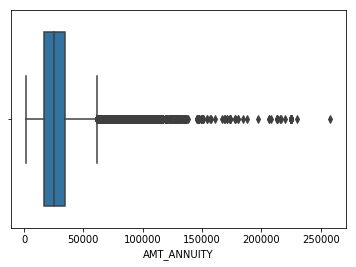

In [30]:
sns.boxplot(ax1['AMT_ANNUITY'].dropna())

In [31]:
ax1['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [32]:
Q11= ax1['AMT_ANNUITY'].quantile(0.10)
print(Q11)
Q31=ax1['AMT_ANNUITY'].quantile(0.99)
print(Q31)
IQR1 = Q31-Q11
print(IQR1)
print(Q11-1.5*IQR1)
print(Q31 +1.5*IQR1)

11074.5
70006.5
58932.0
-77323.5
158404.5


In [33]:
ax1.loc[ax1.AMT_ANNUITY >ax1.AMT_ANNUITY.quantile(0.98),"AMT_ANNUITY"] = ax1.AMT_ANNUITY.quantile(0.98)

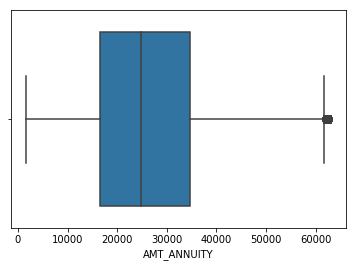

In [34]:
sns.boxplot(ax1['AMT_ANNUITY'])

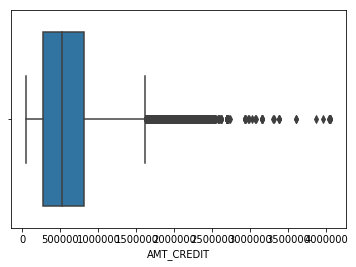

In [35]:
sns.boxplot(ax1['AMT_CREDIT'].dropna())

In [36]:
ax1.loc[ax1.AMT_CREDIT >ax1.AMT_CREDIT.quantile(0.95),"AMT_CREDIT"] = ax1.AMT_CREDIT.quantile(0.95)

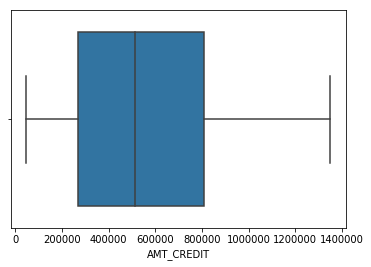

In [37]:
sns.boxplot(ax1['AMT_CREDIT'].dropna())

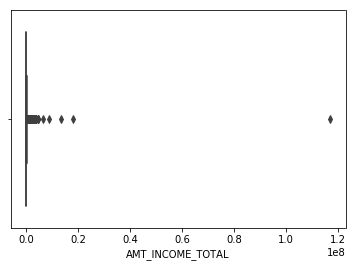

In [38]:
sns.boxplot(ax1['AMT_INCOME_TOTAL'].dropna())

In [39]:
ax1.loc[ax1.AMT_INCOME_TOTAL >ax1.AMT_INCOME_TOTAL.quantile(0.95),"AMT_INCOME_TOTAL"] = ax1.AMT_INCOME_TOTAL.quantile(0.95)

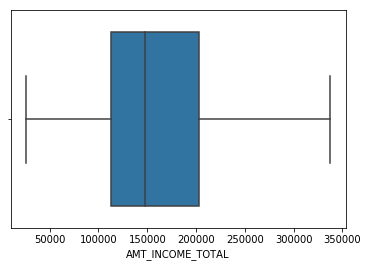

In [40]:
sns.boxplot(ax1['AMT_INCOME_TOTAL'].dropna())

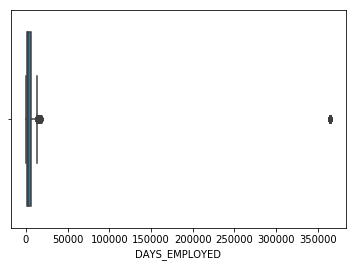

In [41]:
sns.boxplot(abs(ax1['DAYS_EMPLOYED']))

In [42]:
ax1.loc[ax1.DAYS_EMPLOYED >21900, "DAYS_EMPLOYED"] =21900

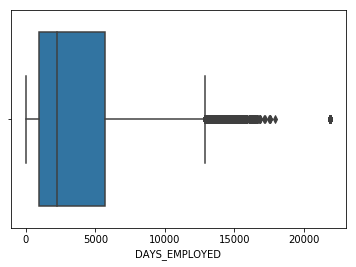

In [43]:
sns.boxplot(abs(ax1['DAYS_EMPLOYED']))

### 3.2.6  Binning columns in categories - AMT_ANNUITY, AGE, AMT_INCOME_TOTAL

In [44]:
# Creating a new DataFrame
ab = pd.DataFrame(ax1)

In [45]:
#Binning AMT_ANNUITY
Low = ab['AMT_ANNUITY'].quantile(0.10)
Medium= ab['AMT_ANNUITY'].quantile(0.50)
High = ab['AMT_ANNUITY'].quantile(0.75)
High1 = ab['AMT_ANNUITY'].quantile(0.9)
Very_High = ab['AMT_ANNUITY'].quantile(1.0)
Low, Medium, High, High1,Very_High

(11074.5, 24903.0, 34596.0, 45954.0, 62964.0)

In [46]:
bins1 = [0,11074.5, 24903.0, 34596.0, 45954.0, 62964.0]
slots1 = ['0-15000','15000-25000','25000 -35000','35000 -50000','50000 and above']

ab['AMT_ANNUITY_RANGE']=pd.cut(ab['AMT_ANNUITY'],bins1,labels=slots1)

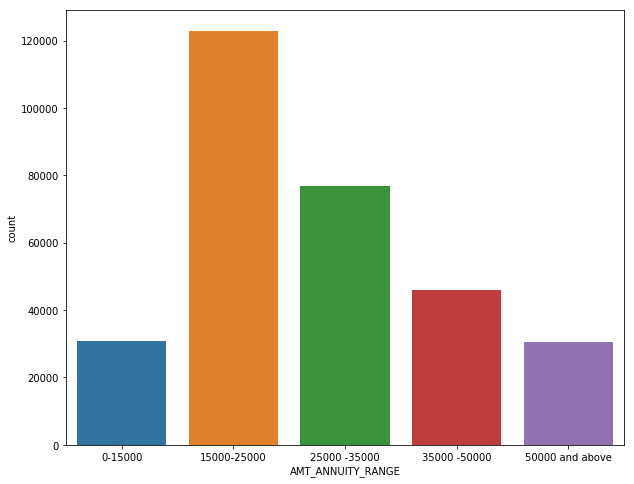

In [47]:

plt.figure(figsize=(10,8))
sns.countplot(ab['AMT_ANNUITY_RANGE'])
plt.show()

In [48]:
#Binning AMT_INCOME_TOTAL
Low = ab['AMT_INCOME_TOTAL'].quantile(0.10)
Medium= ab['AMT_INCOME_TOTAL'].quantile(0.75)
High = ab['AMT_INCOME_TOTAL'].quantile(0.9)
V_High = ab['AMT_INCOME_TOTAL'].quantile(1.0)
Low, Medium, High, V_High

(81000.0, 202500.0, 270000.0, 337500.0)

In [49]:
bins = [0,81000.0, 202500.0, 270000.0, 337500.0]
slots = ['Low', 'Medium', 'High', 'V_High']

ab['AMT_INCOME_RANGE']=pd.cut(ab['AMT_INCOME_TOTAL'],bins,labels=slots)

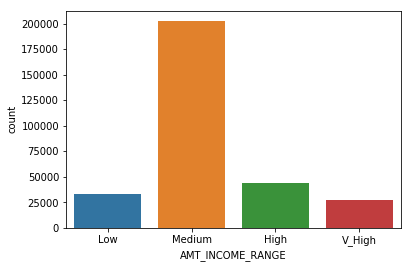

In [50]:
sns.countplot(ab['AMT_INCOME_RANGE'])

In [51]:
#Binning AGE
bins2 = [20,30, 40, 50, 60, 70]
slots2 = ['20-30','30-40','40-50','50-60','60 and above']

ab['AGE_RANGE']=pd.cut(ab['AGE'],bins2,labels=slots2)

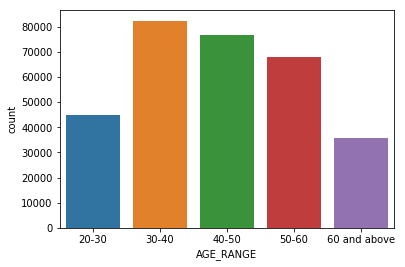

In [52]:
sns.countplot(ab['AGE_RANGE'])

## 4. ANALYSIS

Target variable :
1 - client with payment difficulties--
0 - all other cases


In [53]:
# Dividing the dataset into two. Target=1 (clinnt with payment difficulties) annd Target=0 (the rest)

target0=ab.loc[ab["TARGET"]=='0']
target1=ab.loc[ab["TARGET"]=='1']

In [54]:
#To check Imbalance Percentagef 

round(len(target0)/len(target1),2)

11.39

The Imbalance Ratio between the two data sets is 11.39

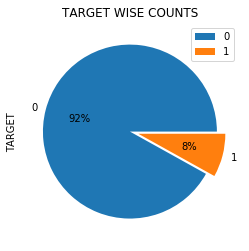

In [55]:
# Using pie chart to show the percentage wise split of data target wise
labels =[0,1]
explode = (0, 0.1) 
ab['TARGET'].value_counts().plot.pie(labels= labels, explode=explode,autopct='%1.0f%%')
plt.title('TARGET WISE COUNTS')
plt.legend(labels)
plt.show()

### 4.2 Univariate Categorical Analysis

In [56]:
ab.nunique().sort_values(ascending=True)

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_INCOME_RANGE                    4
AGE_RANGE                           5
AMT_ANNUITY_RANGE                   5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    19
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
AGE                                50
EXT_SOURCE_3                      814
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2210
AMT_CREDIT                       4483
DAYS_ID_PUBLISH                  6168
AMT_ANNUITY                     11818
DAYS_EMPLOYE

##### CATEGORICAL VARIABLE - NAME_CONTRACT_TYPE

In [57]:
ab.NAME_CONTRACT_TYPE.value_counts(sum)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

In [58]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_ANNUITY_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,-637,-2120,Laborers,1.0,2,2,0.262949,0.139376,0.0,0.0,1.0,26,15000-25000,Medium,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,-18724,-2628,-1827,Cooking staff,1.0,3,2,0.548477,0.190706,0.0,2.0,2.0,52,25000 -35000,Medium,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,-17482,-1262,-1029,Laborers,2.0,2,2,0.306841,0.320163,2.0,0.0,4.0,48,35000 -50000,Medium,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,-13384,-3597,-4409,Sales staff,2.0,3,3,0.674203,0.399676,0.0,0.0,2.0,37,15000-25000,Medium,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,-24794,21900,-4199,Not Specified,2.0,2,2,0.023952,0.720944,0.0,0.0,0.0,68,15000-25000,Low,60 and above


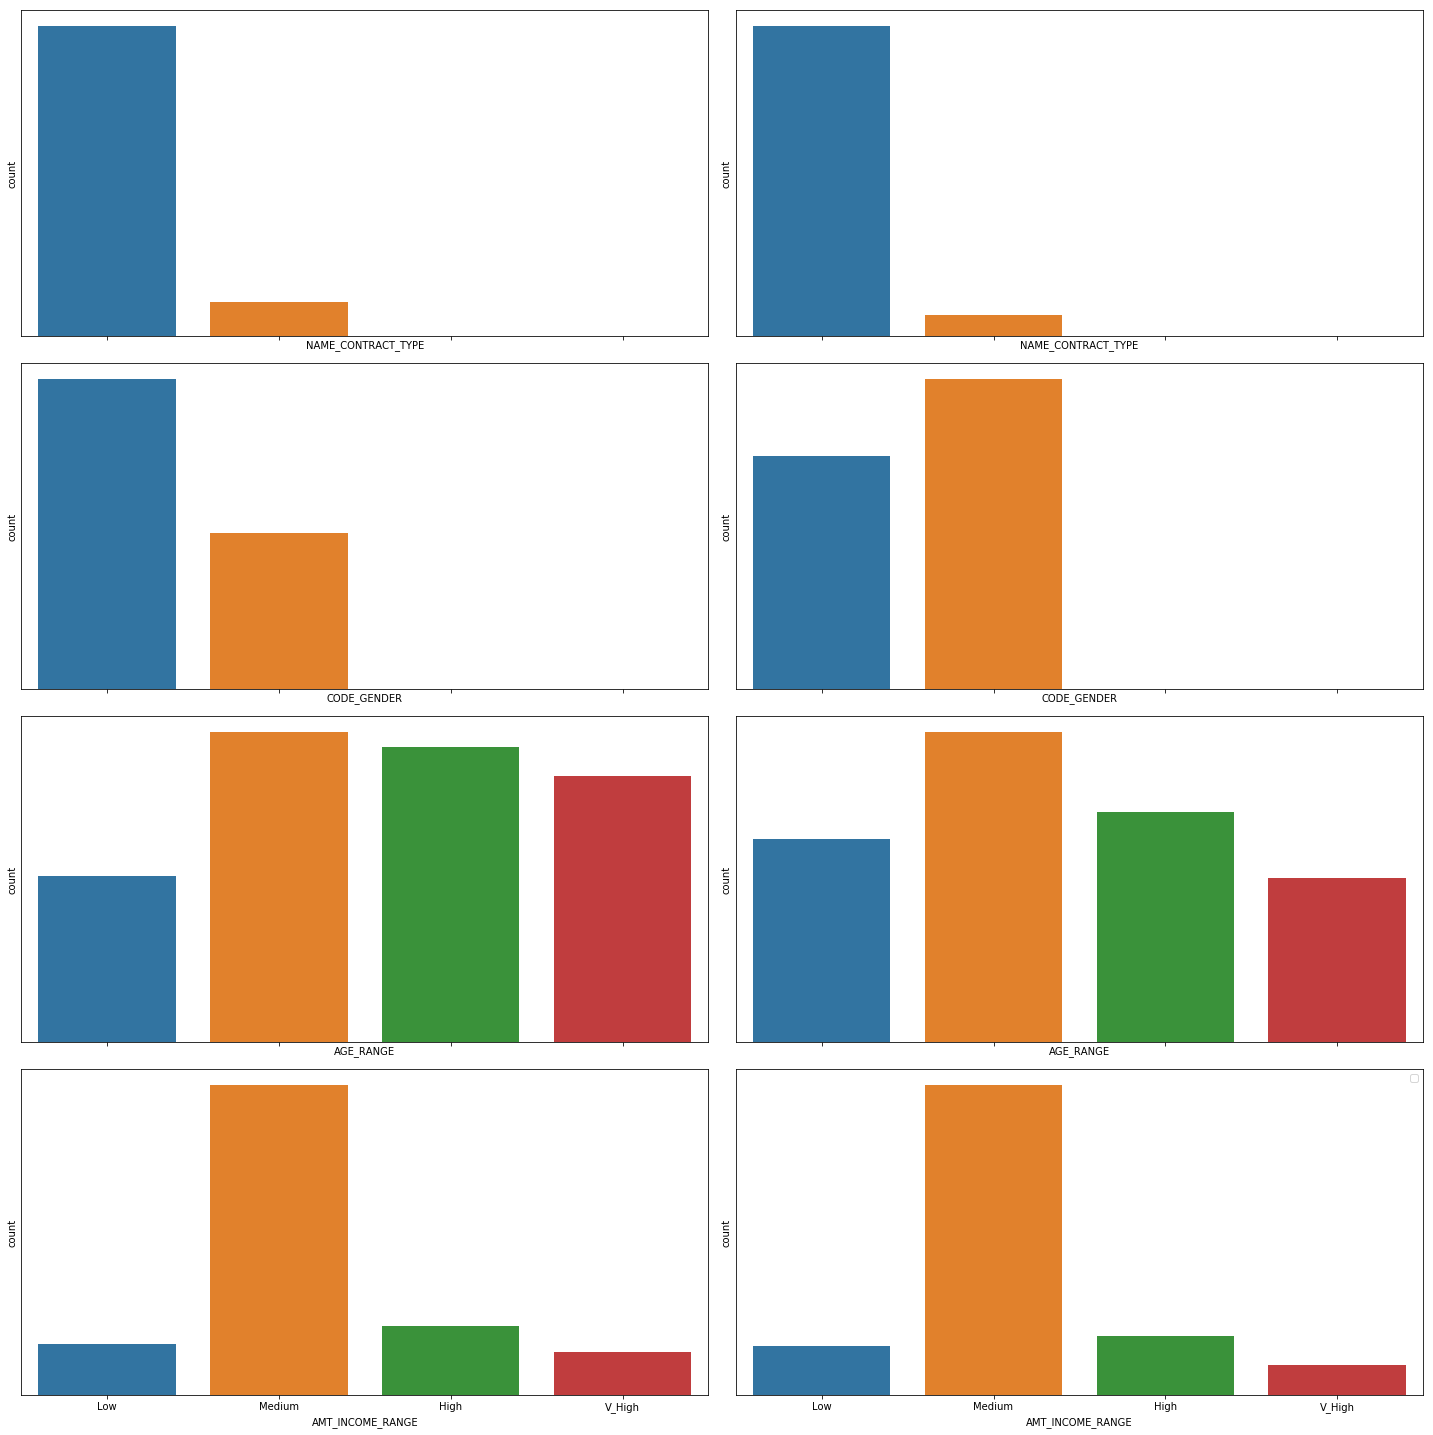

In [59]:
#Univariate analysis for categorical variables with respect to target variable

f, axes = plt.subplots(4, 2, figsize=(20, 20), sharex=True)

sns.countplot(target0.NAME_CONTRACT_TYPE,  ax=axes[0, 0])
sns.countplot(target1.NAME_CONTRACT_TYPE,  ax=axes[0, 1])
sns.countplot(target0.CODE_GENDER,   ax=axes[1, 0])
sns.countplot(target1.CODE_GENDER,  ax=axes[1, 1])
sns.countplot(target0.AGE_RANGE,  ax=axes[2, 0])
sns.countplot(target1.AGE_RANGE,   ax=axes[2, 1])
sns.countplot(target0.AMT_INCOME_RANGE,   ax=axes[3, 0])
sns.countplot(target1.AMT_INCOME_RANGE,   ax=axes[3, 1])
plt.legend()

plt.setp(axes, yticks=[])
plt.tight_layout()

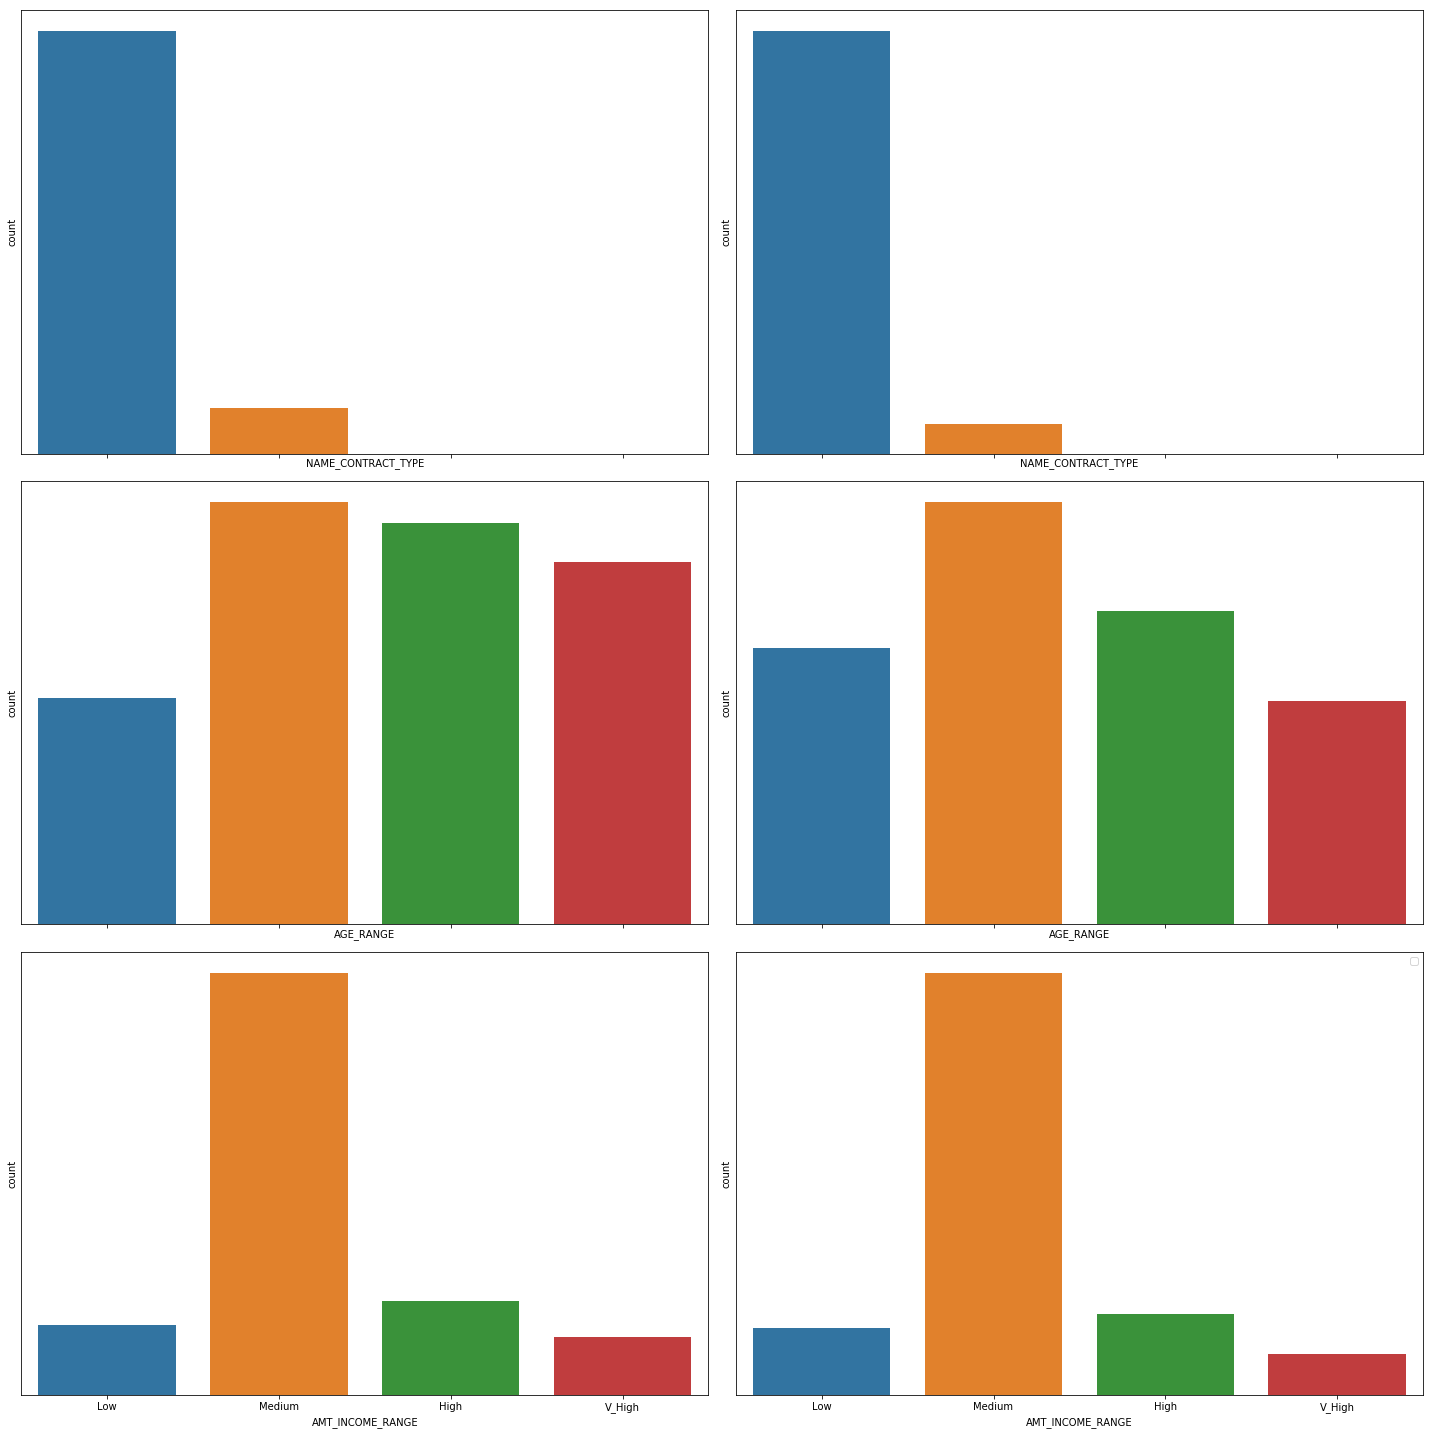

In [60]:
f, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=True)

sns.countplot(target0.NAME_CONTRACT_TYPE,  ax=axes[0, 0])
sns.countplot(target1.NAME_CONTRACT_TYPE,  ax=axes[0, 1])
sns.countplot(target0.AGE_RANGE,  ax=axes[1, 0])
sns.countplot(target1.AGE_RANGE,   ax=axes[1, 1])
sns.countplot(target0.AMT_INCOME_RANGE,   ax=axes[2, 0])
sns.countplot(target1.AMT_INCOME_RANGE,   ax=axes[2, 1])
plt.legend()

plt.setp(axes, yticks=[])
plt.tight_layout()

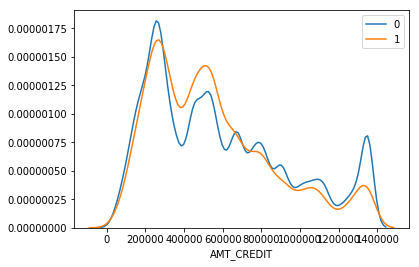

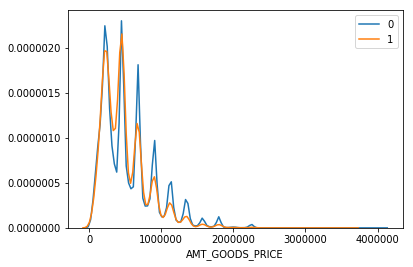

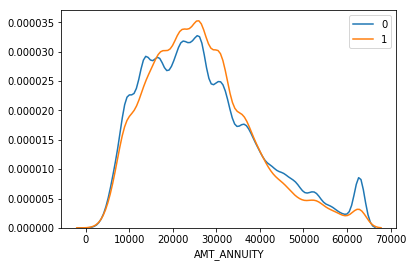

In [61]:
# Univariate analysis for continuous variables with respect to target variable
fig = plt.figure()
TARGET =["0","1"]

for i in TARGET:
    subset = ab[ab['TARGET']==i]
    sns.distplot(subset['AMT_CREDIT'], hist = False,label=i)
plt.legend()
plt.setp(axes, yticks=[])
plt.show()
for i in TARGET:
    subset = ab[ab['TARGET']==i]
    sns.distplot(subset['AMT_GOODS_PRICE'], hist = False,label=i)
plt.legend()
plt.setp(axes, yticks=[])
plt.show()
for i in TARGET:
    subset = ab[ab['TARGET']==i]
    sns.distplot(subset['AMT_ANNUITY'], hist = False,label=i)
plt.legend()
plt.setp(axes, yticks=[])
plt.show()

### 4.3 Finding the Correlation between the numerical variables

In [62]:
target0_df = target0.iloc[0:,2:-7]
target1_df = target1.iloc[0:,2:-7]

In [63]:
target1_df.drop('DAYS_BIRTH',axis=1)
target0_df.drop('DAYS_BIRTH',axis=1)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3
1,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-1188,-291,Core staff,2.0,1,1,0.622246,NaN
2,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-225,-2531,Laborers,1.0,2,2,0.555912,0.729567
3,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-3039,-2437,Laborers,2.0,2,2,0.650442,NaN
4,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-3038,-3458,Core staff,1.0,2,2,0.322738,NaN
5,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,-1588,-477,Laborers,2.0,2,2,0.354225,0.621226
6,Cash loans,F,Y,Y,1,171000.000,1350000.0,41301.0,1395000.0,Commercial associate,Higher education,Married,-3130,-619,Accountants,3.0,2,2,0.724000,0.492060
7,Cash loans,M,Y,Y,0,337500.000,1350000.0,42075.0,1530000.0,State servant,Higher education,Married,-449,-2379,Managers,2.0,3,3,0.714279,0.540654
8,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,21900,-3514,Not Specified,2.0,2,2,0.205747,0.751724
9,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,-2019,-3992,Laborers,1.0,2,2,0.746644,NaN
10,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,652500.0,Working,Higher education,Married,-679,-738,Core staff,3.0,2,2,0.651862,0.363945


In [64]:
target0_df['AGE'] = target0['AGE']
target1_df['AGE'] = target1['AGE']

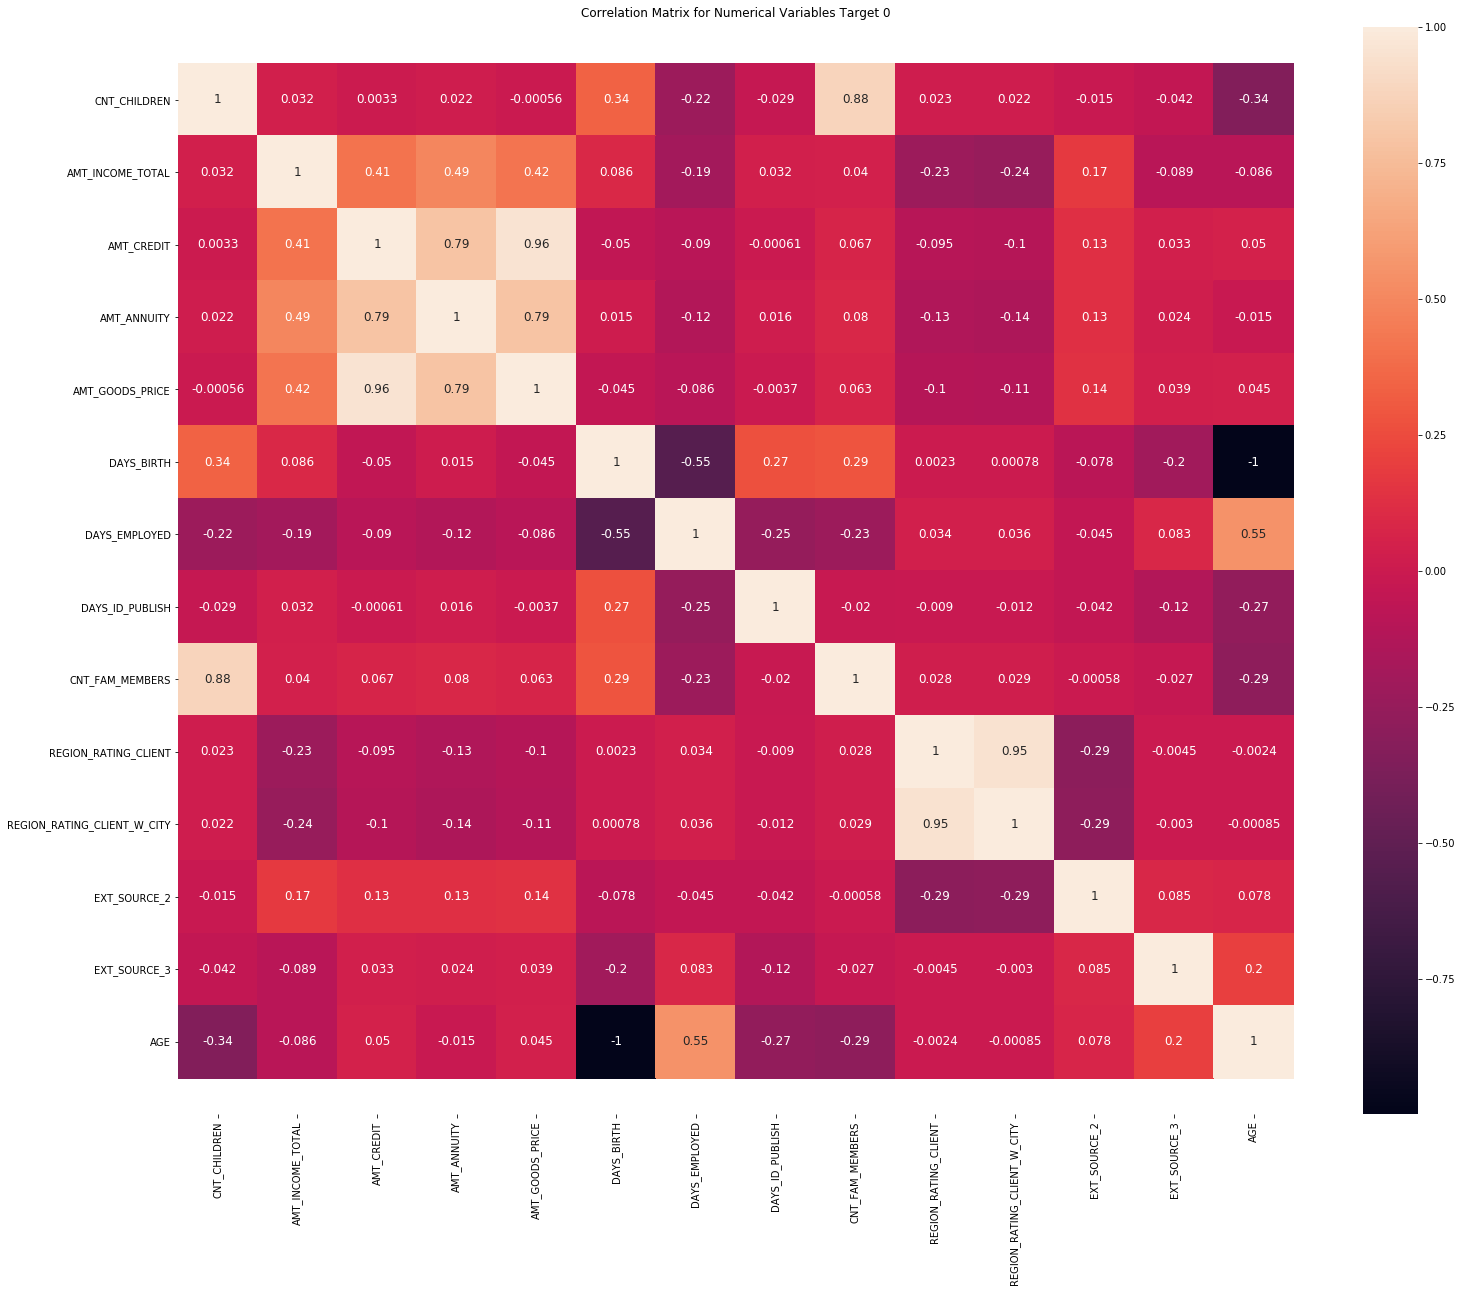

In [65]:
corr0_matrix  = target0_df.corr()
plt.figure(figsize=(25, 20))
ax = sns.heatmap(corr0_matrix, annot = True, annot_kws={"fontsize":"large"})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title("Correlation Matrix for Numerical Variables Target 0",pad=10)
plt.show()


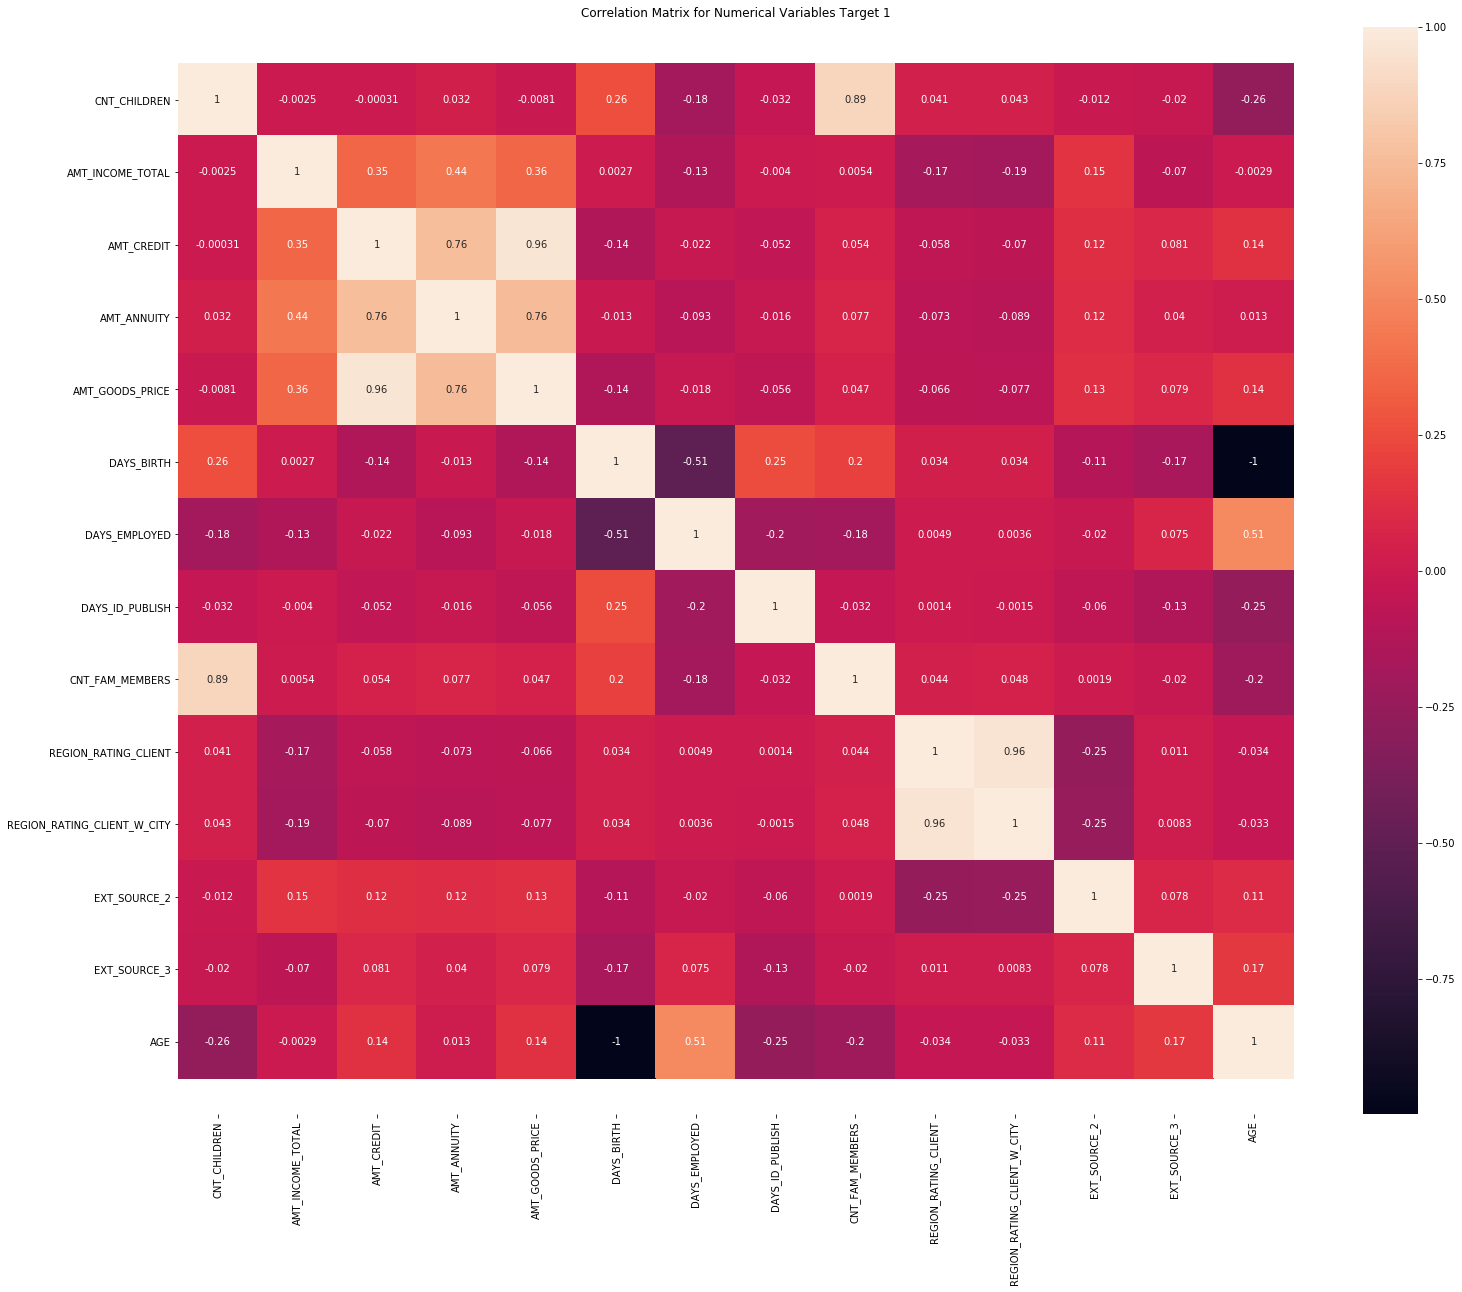

In [66]:
corr1_matrix  = target1_df.corr()
plt.figure(figsize=(25, 20))
ax = sns.heatmap(corr1_matrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title("Correlation Matrix for Numerical Variables Target 1",pad=10)
plt.show()

### 4.4 Bivariate analysis for numerical variables 
### 4.4.1 Categorcal - Continuos Analysis

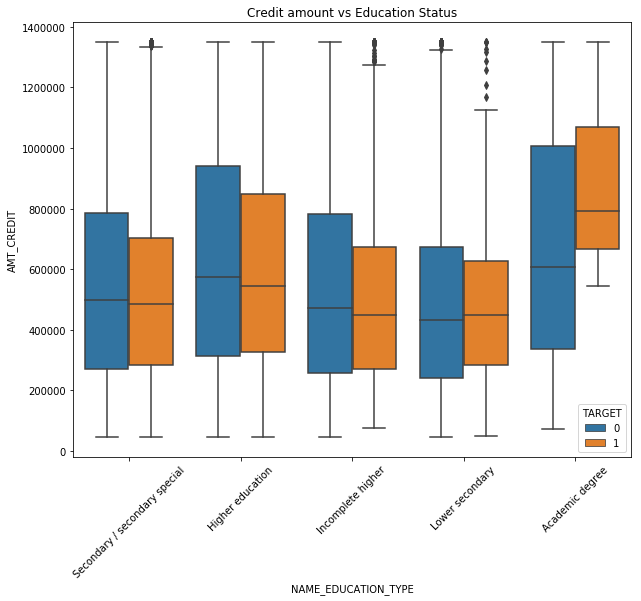

In [67]:
# Credit amount vs Education Status - Target Wise
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.boxplot(data =ab, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='TARGET',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()


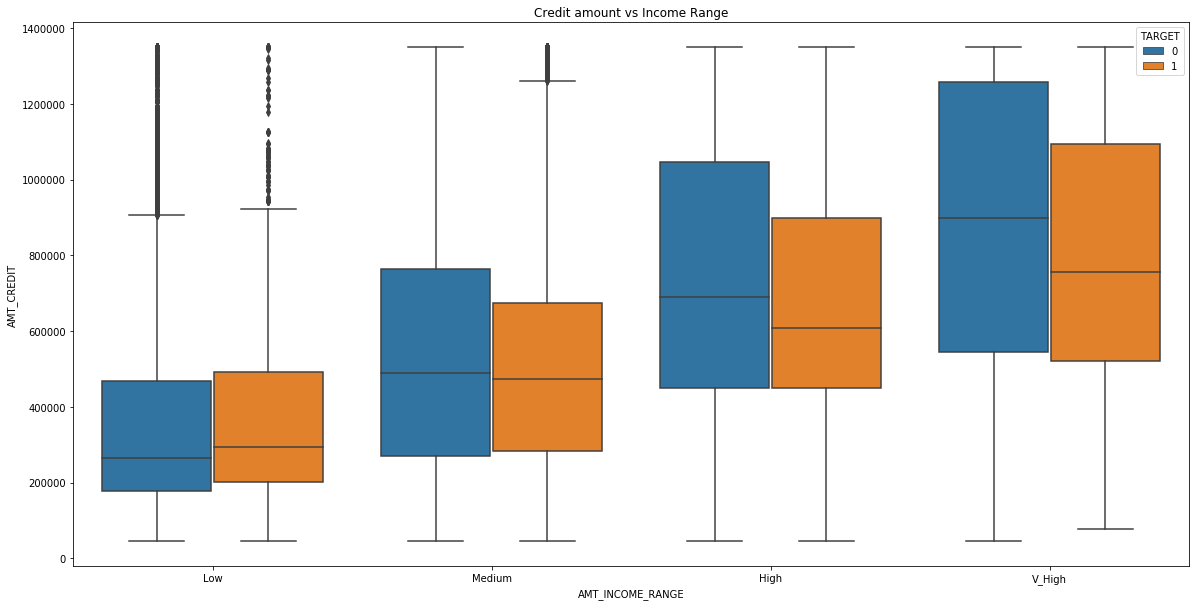

In [68]:
# Credit amount vs Income Range - Target Wise
plt.figure(figsize=(20,10))
plt.xticks()
sns.boxplot(data =ab, x='AMT_INCOME_RANGE',y='AMT_CREDIT', hue ='TARGET',orient='v')
plt.title('Credit amount vs Income Range')
plt.show()

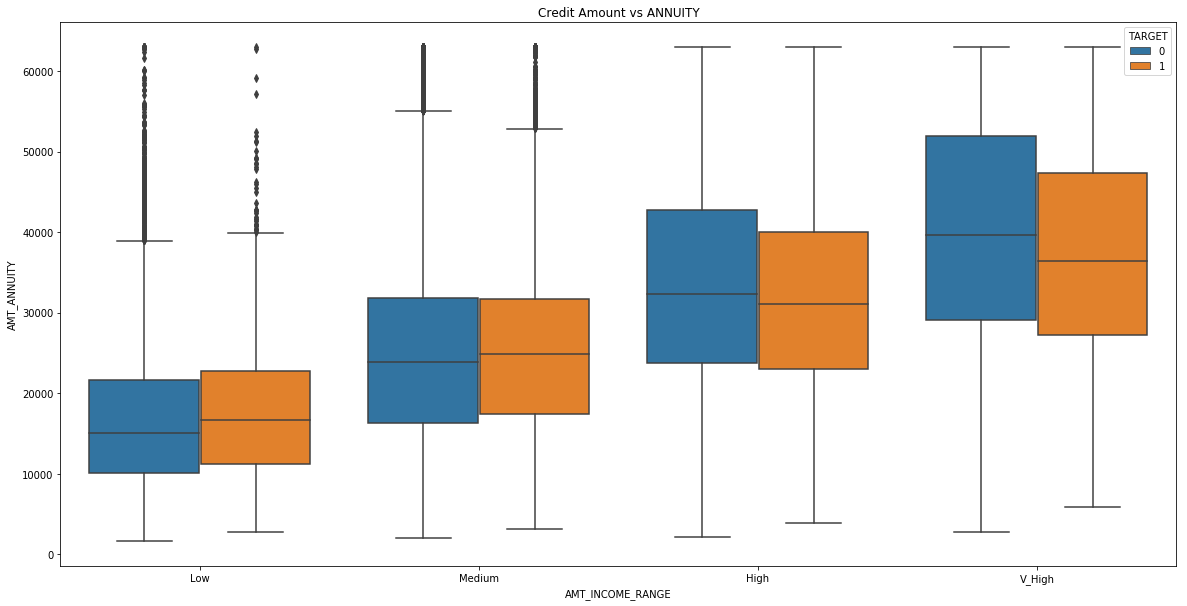

In [69]:
# Credit amount vs Annuity - Target Wise
plt.figure(figsize=(20,10))
plt.xticks()
sns.boxplot(data =ab, x='AMT_INCOME_RANGE',y='AMT_ANNUITY', hue ='TARGET',orient='v')
plt.title('Credit Amount vs ANNUITY')
plt.show()

<Figure size 1000x1000 with 0 Axes>

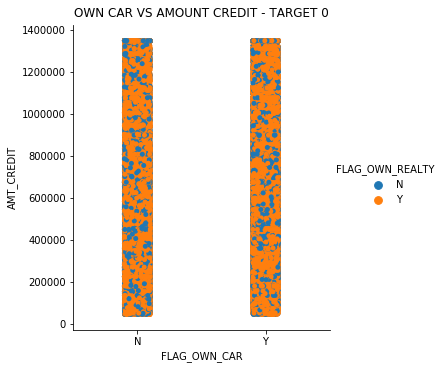

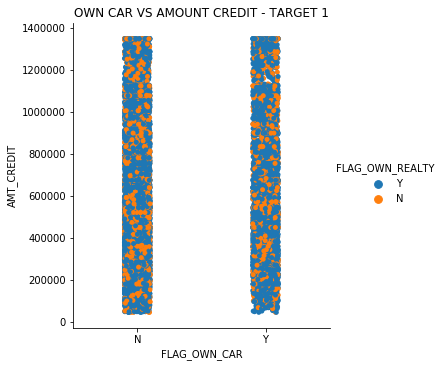

In [70]:
plt.figure(figsize=(10,10))
sns.catplot(x="FLAG_OWN_CAR", y="AMT_CREDIT", hue="FLAG_OWN_REALTY", kind="strip", data=target0);
plt.title("OWN CAR VS AMOUNT CREDIT - TARGET 0",loc="center",pad=8)
sns.catplot(x="FLAG_OWN_CAR", y="AMT_CREDIT", hue="FLAG_OWN_REALTY", kind="strip", data=target1);
plt.title("OWN CAR VS AMOUNT CREDIT - TARGET 1")
plt.show()

### 4.4.2 Categorical - Categorical Variable Analysis

Text(0.5, 1.0, 'AMOUNT INCOME RANGE FOR TARGET 1- MALE VS FEMALE ')

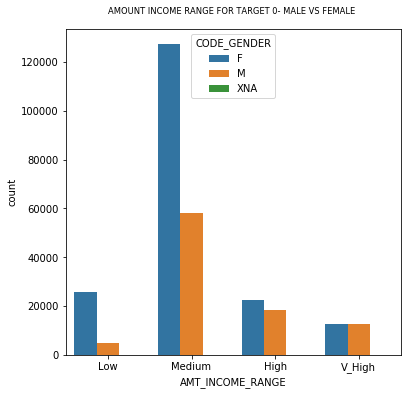

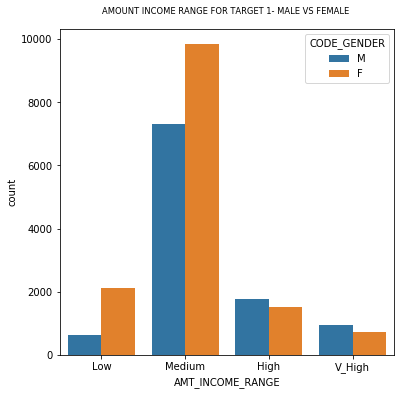

In [71]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'AMT_INCOME_RANGE', hue = 'CODE_GENDER', data = target0)
plt.title("AMOUNT INCOME RANGE FOR TARGET 0- MALE VS FEMALE ",pad=15,fontdict= {'fontsize': 'small'})

plt.figure(figsize=(6,6))
sns.countplot(x = 'AMT_INCOME_RANGE', hue = 'CODE_GENDER', data = target1)
plt.title("AMOUNT INCOME RANGE FOR TARGET 1- MALE VS FEMALE ",pad=15,fontdict= {'fontsize': 'small'})


Text(0.5, 1.0, 'AGE RANGE VS AMT_CREDIT - TARGET WISE')

<Figure size 600x600 with 0 Axes>

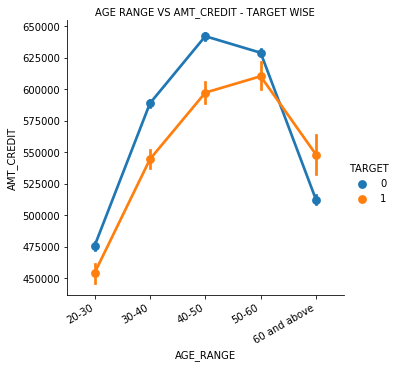

In [72]:
# AGE RANGE VS AMT_CREDIT - TARGET WISE
plt.figure(figsize=(6,6))
ax= sns.catplot(x="AGE_RANGE", y="AMT_CREDIT", hue="TARGET",kind='point',data=ab,fontdict= {'fontsize': 'small'})
ax.fig.autofmt_xdate()
plt.title("AGE RANGE VS AMT_CREDIT - TARGET WISE",fontdict= {'fontsize': 'medium'})

<Figure size 600x600 with 0 Axes>

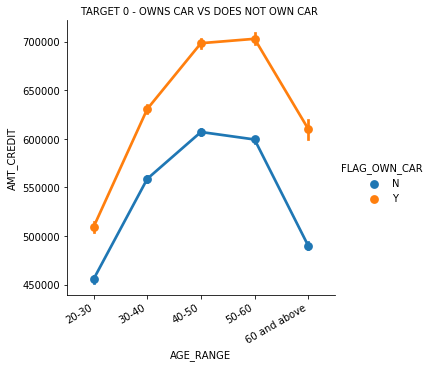

<Figure size 600x600 with 0 Axes>

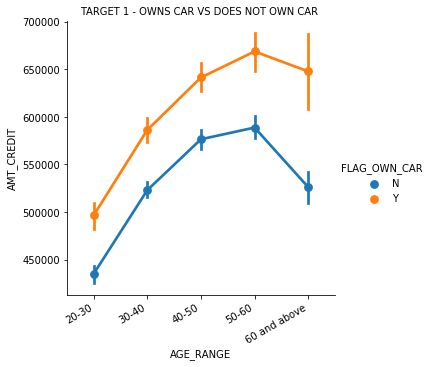

In [73]:
# Checking if owning  a car acrross different age ranges has an impact on the amount od credit
plt.figure(figsize=(6,6))
ax= sns.catplot(x="AGE_RANGE", y="AMT_CREDIT", hue="FLAG_OWN_CAR",kind='point',data=target0,fontdict= {'fontsize': 'small'})
ax.fig.autofmt_xdate()
plt.title("TARGET 0 - OWNS CAR VS DOES NOT OWN CAR ",fontdict= {'fontsize': 'medium'})
plt.show()
plt.figure(figsize=(6,6))
ax= sns.catplot(x="AGE_RANGE", y="AMT_CREDIT", hue="FLAG_OWN_CAR",kind='point',data=target1,fontdict= {'fontsize': 'small'})
ax.fig.autofmt_xdate()
plt.title("TARGET 1 - OWNS CAR VS DOES NOT OWN CAR ",fontdict= {'fontsize': 'medium'})
plt.show()

We can see that people in the age group of 40-60 and those who have a car opt for higher amount of credit

### 4.4.3 CONTINUOUS - CONTINUOUS VARIABLE ANALYSIS

<Figure size 6000x2000 with 0 Axes>

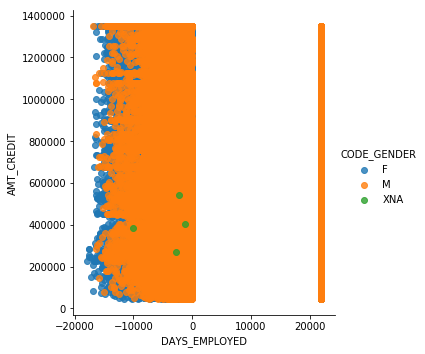

In [76]:
plt.figure(figsize=(60,20))
sns.lmplot('DAYS_EMPLOYED', 'AMT_CREDIT', data=target0, hue = 'CODE_GENDER', fit_reg = False)
plt.show()

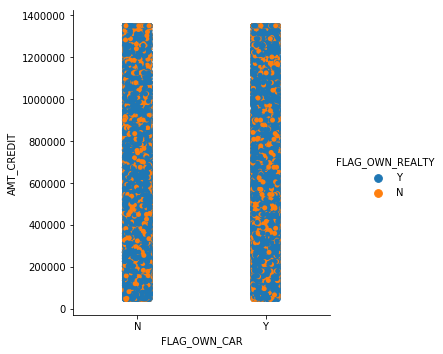

In [75]:
#Owning  a car/ real estate vs amt_credit
sns.catplot(x="FLAG_OWN_CAR", y="AMT_CREDIT", hue="FLAG_OWN_REALTY", kind="strip", data=ab);

## 5.  Previous Application Data

### 5.1 Checking Structure of Data

In [77]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [79]:
prev.shape

(1670214, 37)

In [80]:
prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [81]:
prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### MERGING THE PREVIOUS AND THE APPLICATION DATASETS

In [82]:
#To clean the dataset 

#To list the columns having more than 50% null values. 

col1= prev.isnull().sum()
col1=col1[col1.values>(0.5*len(col1))]
len(col1)

15

In [83]:
#Removing those columns

col1 = list(col1[col1.values>=0.5].index)
prev.drop(labels=col1,axis=1,inplace=True)
prev.shape

(1670214, 22)

In [85]:
#To remove the XNA and XAP values from the dataset. 

prev=prev.drop(prev[prev['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev=prev.drop(prev[prev['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

prev.shape

(69635, 22)

In [86]:

newdf= pd.merge(left=ab,right=prev,how='left',on='SK_ID_CURR',suffixes='_x')
newdf.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_ANNUITY_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,-637,-2120,Laborers,1.0,2,2,0.262949,0.139376,0.0,0.0,1.0,26,15000-25000,Medium,20-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,-1188,-291,Core staff,2.0,1,1,0.622246,NaN,0.0,0.0,0.0,46,35000 -50000,High,40-50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,-225,-2531,Laborers,1.0,2,2,0.555912,0.729567,0.0,0.0,0.0,53,0-15000,Low,50-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,-3039,-2437,Laborers,2.0,2,2,0.650442,NaN,NaN,NaN,NaN,53,25000 -35000,Medium,50-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,-3038,-3458,Core staff,1.0,2,2,0.322738,NaN,0.0,0.0,0.0,55,15000-25000,Medium,50-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,-16941,-1588,-477,Laborers,2.0,2,2,0.354225,0.621226,0.0,1.0,1.0,47,25000 -35000,Medium,40-50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1350000.0,41301.0,1395000.0,Commercial associate,Higher education,Married,-13778,-3130,-619,Accountants,3.0,2,2,0.724000,0.492060,1.0,1.0,2.0,38,35000 -50000,Medium,30-40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100010,0,Cash loans,M,Y,Y,0,337500.0,1350000.0,42075.0,1530000.0,State servant,Higher education,Married,-18850,-449,-2379,Managers,2.0,3,3,0.714279,0.540654,0.0,0.0,0.0,52,35000 -50000,V_High,50-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,-20099,21900,-3514,Not Specified,2.0,2,2,0.205747,0.751724,0.0,0.0,1.0,56,25000 -35000,Medium,50-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,-14469,-2019,-3992,Laborers,1.0,2,2,0.746644,NaN,NaN,NaN,NaN,40,15000-25000,Medium,30-40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


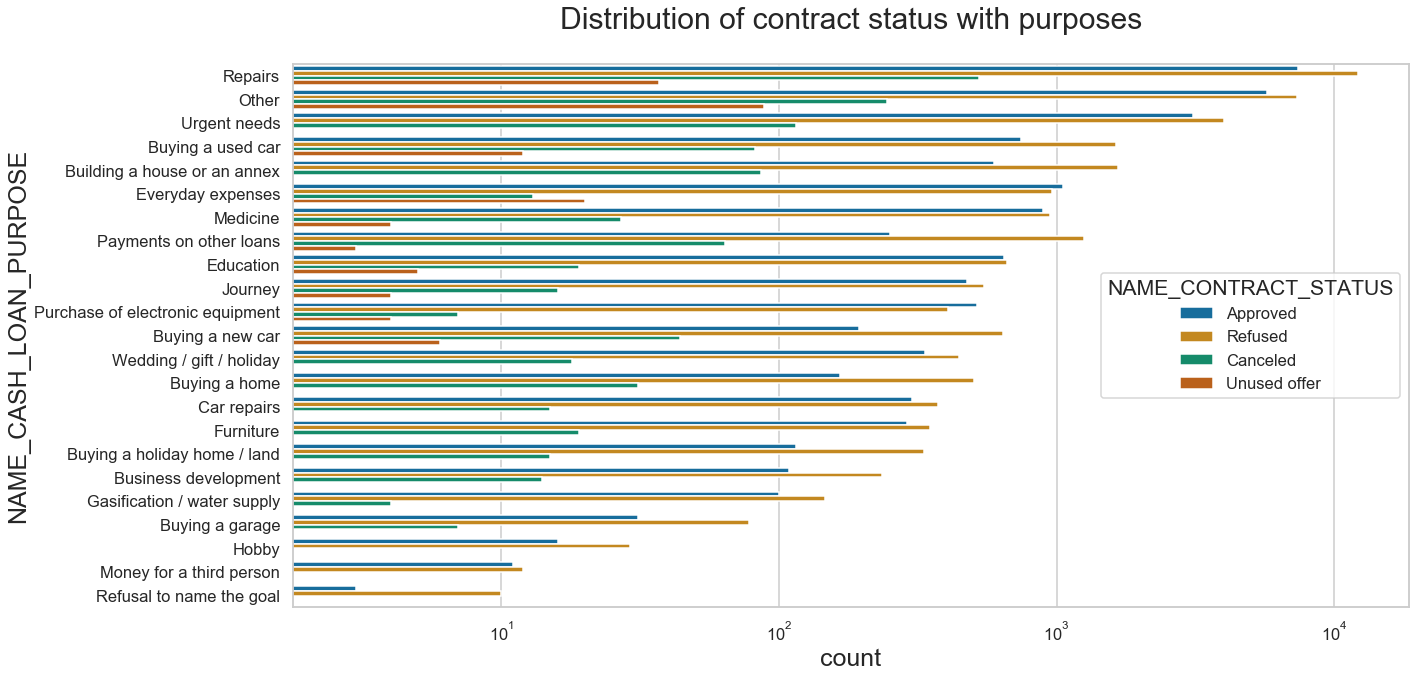

In [87]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,10))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 35
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = newdf, y= 'NAME_CASH_LOAN_PURPOSE', 
order=newdf['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='colorblind')

Points to be noted:
Most of the rejection of loans came from the purpose of 'repairs'.
The ratio of Approved to Rejection is almost equal to 1 for "Education Purposes".
Payment on other loans,buying a new car and buying a home have significant higher rejection rates than approvals.

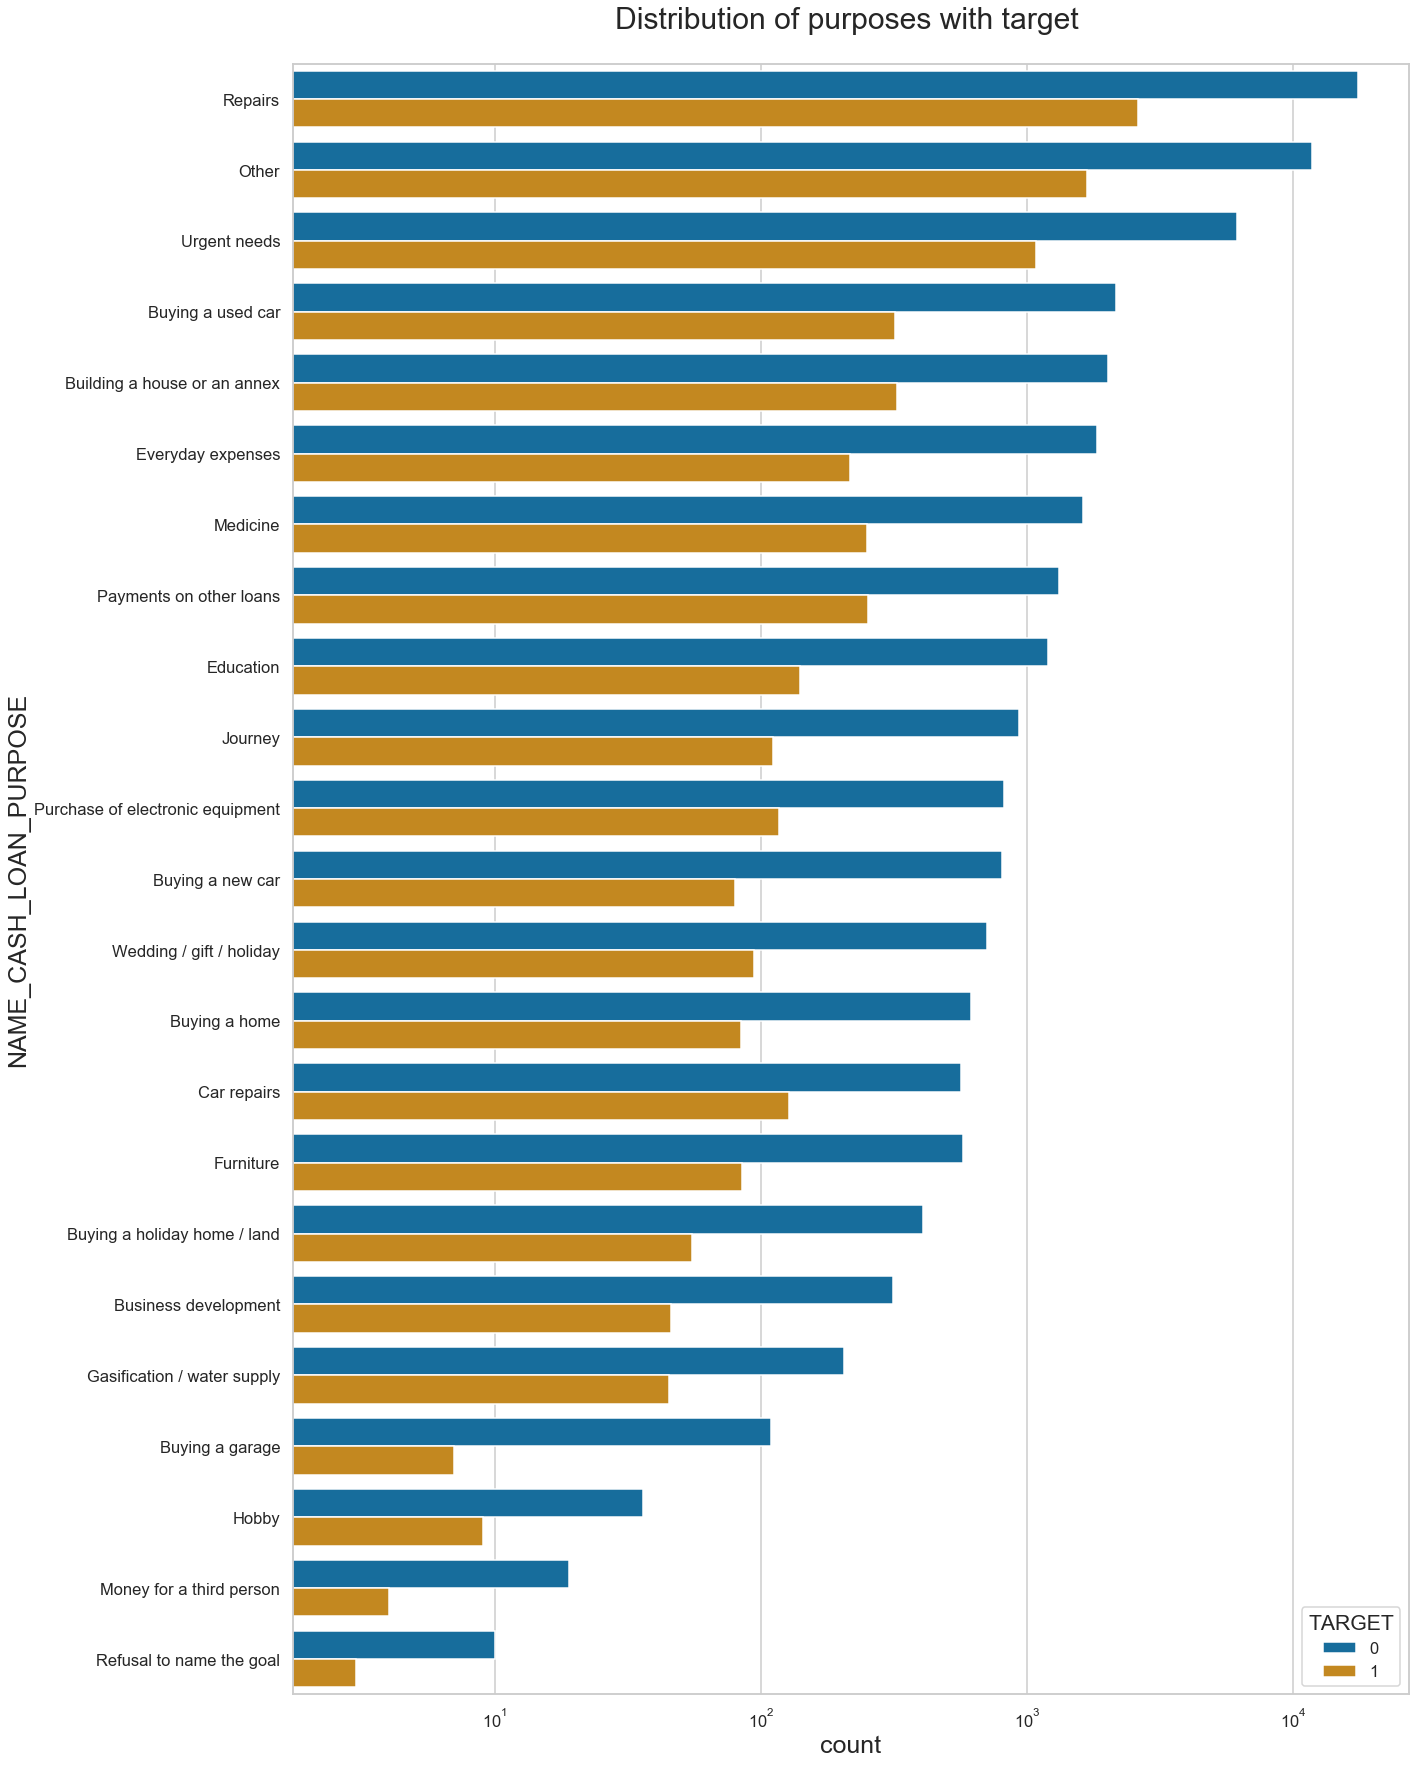

In [88]:
#Distribution of purposes with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,30))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 35
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = newdf, y= 'NAME_CASH_LOAN_PURPOSE',
order=newdf['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='colorblind')

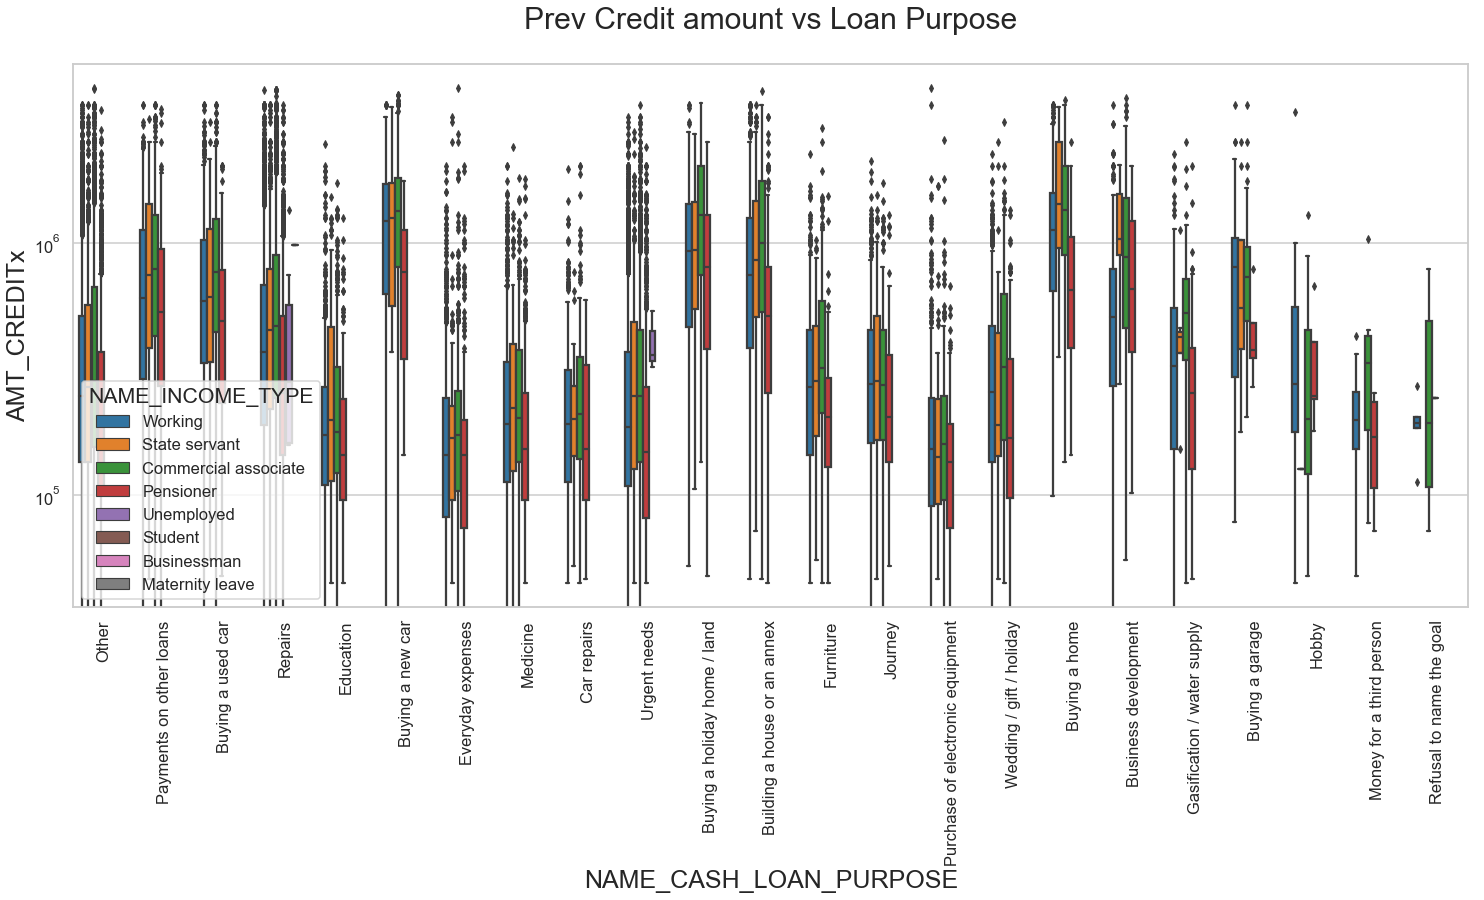

In [89]:
#Credit Amount (Box Plot)

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =newdf, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDITx',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()